Saving tamil2.zip to tamil2.zip
User uploaded file "tamil2.zip" with length 104918 bytes


Saving tamil_binary_sentiment_1k_tweets_v1.csv to tamil_binary_sentiment_1k_tweets_v1.csv
User uploaded file "tamil_binary_sentiment_1k_tweets_v1.csv" with length 403482 bytes


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/tamil_binary_sentiment_1k_tweets_v1.csv')
df.head()

,tweet,sentiment
0,உன்னைத்தொட்டால் உன்னுள்ளத்தை நொருக்கமாட்டியோ!!...,Happy
1,நதியா நதியா நயில் நதியா\n…\nஇடை தான் கொடியா \n...,Happy
2,உறக்கம் விற்று கனவுகள் வாங்கலையா?! #TamilLyric...,Sad
3,மீண்டும் உன்னை காணும் மனமே ... வேண்டும் எனக்கே...,Sad
4,உயிரை தொலைத்தேன் அது உன்னில் தானோ ... இது நான்...,Sad


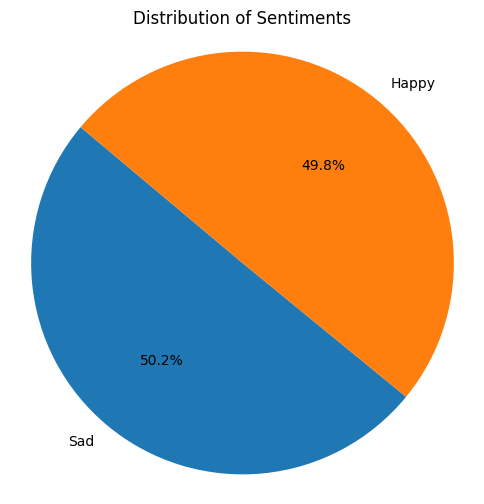

In [ ]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
from collections import Counter
import re

all_tweets = ' '.join(df['tweet'].astype(str).tolist())
words = re.findall(r'[^\s]+', all_tweets.lower())
word_counts = Counter(words)

top_20_words = word_counts.most_common(20)

print("Top 20 most occurring words:")
for word, count in top_20_words:
    print(f"{word}: {count}")

Top 20 most occurring words:
பாசம்: 296
என்: 158
#tamillyrics: 131
ஒரு: 126
தான்: 119
காதல்: 107
நீ: 104
மழை: 99
அன்பு: 97
உன்: 91
நான்: 88
…: 74
சோகம்: 69
இந்த: 66
-: 57
என்ன: 54
என்று: 52
இல்லை: 44
இசை: 44
|: 44


In [ ]:
def replace(x):
  if x=='Happy':
    return 'Positive'
  else:
    return 'Negative'
df['sentiment'] = df['sentiment'].apply(replace)

In [ ]:
df = df.dropna(subset=["tweet"])


In [ ]:
import unicodedata

df["tweet"] = df["tweet"].apply(lambda x: unicodedata.normalize("NFC", str(x).strip()))

In [ ]:
import re

import re

def clean_text(text):
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^\u0B80-\u0BFF\s]", " ", text)
    return " ".join(text.split())

df["tweet_clean"] = df["tweet"].apply(clean_text)

changed_rows = df[df["tweet"] != df["tweet_clean"]]

for idx, row in changed_rows.iterrows():
    print(f"\nRow {idx}:")
    print("Original:", row["tweet"])
    print("Cleaned :", row["tweet_clean"])




Row 0:
Original: உன்னைத்தொட்டால் உன்னுள்ளத்தை நொருக்கமாட்டியோ!! என்னைப் போல பெண்ணைப்ப் பார்த்து மயங்க மாட்டியோ!!  #RaOne #chammakChallo #tamilLyrics
Cleaned : உன்னைத்தொட்டால் உன்னுள்ளத்தை நொருக்கமாட்டியோ என்னைப் போல பெண்ணைப்ப் பார்த்து மயங்க மாட்டியோ

Row 1:
Original: நதியா நதியா நயில் நதியா
…
இடை தான் கொடியா 
கொடி மேல் கனியா
#RDBurnam #HindMusic #TamilLyrics
Cleaned : நதியா நதியா நயில் நதியா இடை தான் கொடியா கொடி மேல் கனியா

Row 2:
Original: உறக்கம் விற்று கனவுகள் வாங்கலையா?! #TamilLyrics RT @JanuShath: கனவுகள் விற்றுக் கவிதைகள் வாங்குவதும், கவிதைகள் விற்றுக் காதலை வாங்குவதுமாய்.
Cleaned : உறக்கம் விற்று கனவுகள் வாங்கலையா கனவுகள் விற்றுக் கவிதைகள் வாங்குவதும் கவிதைகள் விற்றுக் காதலை வாங்குவதுமாய்

Row 3:
Original: மீண்டும் உன்னை காணும் மனமே ... வேண்டும் எனக்கே மனமே மனமே !!! #TamilLyrics
Cleaned : மீண்டும் உன்னை காணும் மனமே வேண்டும் எனக்கே மனமே மனமே

Row 4:
Original: உயிரை தொலைத்தேன் அது உன்னில் தானோ ... இது நான் காணும் கனவோ நிஜமோ...அன்பே உயிரை தொடுவேன் உன்னை தாலாட்டுதே பார்வைகள் ! #Ta

In [ ]:
import re

def remove_repeating_chars(text):
    return re.sub(r"(.)\1{1,}", r"\1", text)

df["tweet_normalized"] = df["tweet_clean"].astype(str).apply(remove_repeating_chars)

changed_rows = df[df["tweet"] != df["tweet_normalized"]]


In [ ]:
df_processed = df[['tweet_normalized', 'sentiment']].copy()
display(df_processed.head())

,tweet_normalized,sentiment
0,உன்னைத்தொட்டால் உன்னுள்ளத்தை நொருக்கமாட்டியோ எ...,Positive
1,நதியா நதியா நயில் நதியா இடை தான் கொடியா கொடி ம...,Positive
2,உறக்கம் விற்று கனவுகள் வாங்கலையா கனவுகள் விற்ற...,Negative
3,மீண்டும் உன்னை காணும் மனமே வேண்டும் எனக்கே மனம...,Negative
4,உயிரை தொலைத்தேன் அது உன்னில் தானோ இது நான் காண...,Negative


In [ ]:
df_processed.to_csv('normalized_text.csv', index=False)
print("DataFrame saved to normalized_text.csv")

DataFrame saved to normalized_text.csv
